In [26]:
# Let's import the nltk module
import nltk


In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [2]:
# To start, we need some text to play with. NLTK has many corpora and resources for you to explore natural language. 
# A one-off run nltk.download() will get you all the resources in one go. Once you've done that you should have a repository
# of interesting texts including stuff like Moby Dick and an Inaugural Address Corpus.

from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [6]:
# These texts have now been loaded and you can refer to them by their names. These are objects of type 'Text' and they have a 
# bunch of cool methods to explore text.

# Concordance will print all the occurances of a word along with some context. Let's explore two seperate texts - Moby Dick and 
# Sense and Sensibility. As expected, word usage and language in both these books are pretty different. 

text1.concordance("monstrous")


Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [7]:
text2.concordance("monstrous")

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


In [8]:
# As you can see, Melville uses the word 'monstrous' in a different connotation than Austen. He uses it to indicate size
# and things that are terrifying, Austen uses it in a posivite connotation.
# Let's see what other words appear in the same context as monstrous.

text2.similar('monstrous')

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [10]:
# Clearly Austen uses "monstrous" to represent positive emotions and to amplify those emotions. She seems to use it
# interchangeably with "very."

text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


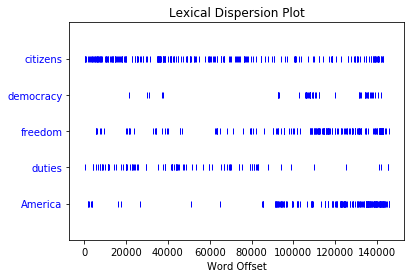

In [11]:
# These are fun ways to explore the usage of natural language in different contexts or situations. Let's see how the 
# usage of certain Presidents has changed over the year.
# (Do install matplotlib before run the below line of code)

text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])


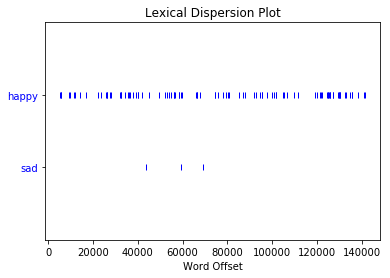

In [12]:
# Let's see what kind of emotions are expressed in Jane Austen's works vs Herman Melville's
text2.dispersion_plot(["happy", "sad"])

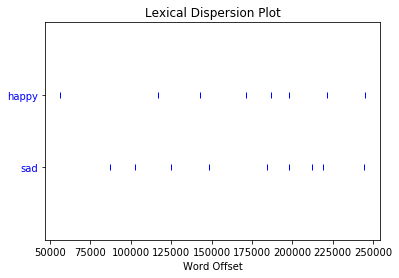

In [13]:
text1.dispersion_plot(["happy", "sad"])

In [14]:
# Now let's get to some serious stuff. Often you want to extract features from 
# a text - these are attributes that will represent the text. - words or sentences 
# How do we split a piece of a text into constituent sentences/words? (these are called tokens)

from nltk.tokenize import word_tokenize, sent_tokenize 
text = "Mary had a little lamb. Her fleece were white as snow"
sents = sent_tokenize(text)

In [15]:
print(sents)

['Mary had a little lamb.', 'Her fleece were white as snow']


In [16]:
words = [word_tokenize(sent) for sent in sents]

In [17]:
print(words)

[['Mary', 'had', 'a', 'little', 'lamb', '.'], ['Her', 'fleece', 'were', 'white', 'as', 'snow']]


In [27]:
# Let's filter out stopwords (words that are very common like 'was', 'a', 'as' etc)
from nltk.corpus import stopwords 
from string import punctuation
customStopWords = set(stopwords.words('english') + list(punctuation))
# Notice how we made that stopwords a set 

wordsWOStopwords =  [word for word in word_tokenize(text) if word not in customStopWords]

NameError: name 'text' is not defined

In [20]:
print(wordsWOStopwords)

['Mary', 'little', 'lamb', 'Her', 'fleece', 'white', 'snow']


In [21]:
text2 = "Mary closed on closing night when she was in the mood to close." 
# 'close' appears in different morphological form here, stemming will reduce all form of the word 'close' to its root 
# NLTK has multiple stemmers based on different rules/algorithms. Stemming is also known as lemmatization. 

from nltk.stem.lancaster import LancasterStemmer
st = LancasterStemmer()
stemmedWords = [st.stem(word) for word in word_tokenize(text2)]

In [22]:
print(stemmedWords)

['mary', 'clos', 'on', 'clos', 'night', 'when', 'she', 'was', 'in', 'the', 'mood', 'to', 'clos', '.']


In [23]:
# NLTK has functionality to automatically tag words as nouns, verbs, conjunctions etc.
nltk.pos_tag(word_tokenize(text2))

[('Mary', 'NNP'),
 ('closed', 'VBD'),
 ('on', 'IN'),
 ('closing', 'NN'),
 ('night', 'NN'),
 ('when', 'WRB'),
 ('she', 'PRP'),
 ('was', 'VBD'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('mood', 'NN'),
 ('to', 'TO'),
 ('close', 'VB'),
 ('.', '.')]

# Beautiful Soup

In [35]:
from bs4 import BeautifulSoup

# Let's create an example html to play with 

html = ['<html><heading style="font-size:20px"><i>This is the little<br><br><i></heading>',
        '<body> <b> This is the body</b><p id="para1">This is para1<a href="www.google.com">Google</a></p>',
        '<p id="para2">This is para 2</p></body></html>']
html = ''.join(html)
# This just creates one string out of the list above 

In [36]:
# Instantiate a soup object. This automatically identifies a structure in the html and creates a parse tree 
# you can navigate the structure/tree in the soup and extract pieces that you are interested in 
soup = BeautifulSoup(html)

# You can now print this html in the formatted, easy to read view
print(soup.prettify())

<html>
 <body>
  <heading style="font-size:20px">
   <i>
    This is the little
    <br/>
    <br/>
    <i>
    </i>
   </i>
  </heading>
  <b>
   This is the body
  </b>
  <p id="para1">
   This is para1
   <a href="www.google.com">
    Google
   </a>
  </p>
  <p id="para2">
   This is para 2
  </p>
 </body>
</html>


C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [37]:
# name attribute is just name of the tag
soup.html.name

'html'

In [38]:
soup.body.name

'body'

In [39]:
# text attribute will much together all the text in all the children of that tag
soup.body.text

'This is the little  This is the bodyThis is para1GoogleThis is para 2'

In [40]:
# contents is the list of children of that tag
soup.html.contents

[<body><heading style="font-size:20px"><i>This is the little<br/><br/><i></i></i></heading> <b> This is the body</b><p id="para1">This is para1<a href="www.google.com">Google</a></p><p id="para2">This is para 2</p></body>]

In [41]:
# parent and siblings refrencing helps you navigate the parse tree
soup.body.parent.name

'html'

In [42]:
soup.b.nextSibling

<p id="para1">This is para1<a href="www.google.com">Google</a></p>

In [43]:
soup.p.previousSibling

<b> This is the body</b>

In [44]:
# findAll, find are methods to search the tree for specific tags, or tags with certain attributes

bold = soup.findAll('b')
# This will find all the tags which have the text in bold and return a list
print(bold)

[<b> This is the body</b>]


In [45]:
# to extract only the text, take each element of this list and get the text attribute 
print(bold[0].text)

 This is the body


In [46]:
# Let's get all the text that is in the paragraphs as a single string
paras = ' '.join([p.text for p in soup.findAll('p')])

In [47]:
print(paras)

This is para1Google This is para 2


In [48]:
# find All can look for attributes as well. Let's find the text for the paragraph with id 'para2'
soup.findAll(id="para2")[0].text
# soup.findall gives us a list, we pick the first element and print the text

'This is para 2'

In [49]:
# Let's find any text with font size 20

font20 = ' '.join([p.text for p in soup.findAll(style="font-size:20px")])
print(font20)

This is the little


In [50]:
# You can also pass in a list or a dictionary of tag names to search for 
soup.findAll(['b', 'p'])
soup.findAll({'b':True, 'p':True})

[<b> This is the body</b>,
 <p id="para1">This is para1<a href="www.google.com">Google</a></p>,
 <p id="para2">This is para 2</p>]

In [51]:
# Let's see how we can find links. This is super-useful - say you want to find all the links on a page and iterate through 
# them to do some scraping for each of those links

links = soup.find('a')
print(links)


<a href="www.google.com">Google</a>


In [52]:
# Notice how we used 'find' instead of 'findAll' - this just will give us the first tag that matches the search, in this
# case we have only 1 link on our page. soup.findAll will return a list of links and you can limit the number of 
# results using the limit keyword 'soup.findAll('a', limit=10)' 

In [53]:
# Let's extract the url and text seperately
print(links['href']+ " is the url and " +links.text+ " is the text ")

www.google.com is the url and Google is the text 


In [54]:
# find can navigate the parse tree as well. findParents, findNextSiblings, findPreviousSiblings all work
# similar to findAll, but will search within those branches of the tree. 
# findNext, findPrevious and findAllNext and findAllPrevious can be used to find matches starting from 
# a specified point. 

# Let's say you want the text of the first paragraph after the first occurance of the text "Google"
soup.find(text="Google").findNext('p').text

'This is para 2'

In [55]:
# A little shortcut to using findAll - if you call the tag itself as a function, you can use it in place of findAll 
# with the same arguments 

soup.body('p')

[<p id="para1">This is para1<a href="www.google.com">Google</a></p>,
 <p id="para2">This is para 2</p>]

In [56]:
soup.findAll('p')

[<p id="para1">This is para1<a href="www.google.com">Google</a></p>,
 <p id="para2">This is para 2</p>]

# Text Summarization

In [12]:
#############################################################################################################
# This exercise is based pretty much entirely off this excellent blog 
# post: http://glowingpython.blogpost.in/2014/09/text-summarization-with-nl
# Thanks to the kind soul that wrote this - really interesting blog!
##############################################################################################################

##############################################################################################################
# nltk = "natural language processing toolkit" is a python library 
# with the support of natural language processing. Super-handy.
# Specifically, we will use 2 functions from nltk in this drill.
# sent_tokenize: given a group of text tokens, tokenize(split)
#                into sentences
# word_tokenize: given a group of text tokens, tokenize(split) 
#                into words.
# We will also use:
#      stopwords.words('english') 
#      One last bit: We need to nltk.download() if we haven't
###############################################################################################################

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

In [13]:
######################################################################################################################
# We have used dictionaries so far, but now we have covered classes, this is a good time to introduce 'defaultdict'. 
# This is the class inherits from dictionary, but has one additional nice feature: 
# Usually, a Python dictinary will throw a KeyError if you try to get an item with a key that is not in the dictionary.
# defaultdict() will do a bit better -- rather than throw a KeyError. It will create a "default item and add that key-value
# pair to the dictionary.
# Your likely question - how will know it what default item to use as the value? The answer: in its constructor, it will take
# in a function that creates a default object.  More below.
#
# Just remember that defaultdict inherits from ("is-a") dictionary.
# This means that a defaultdict can be used in all situation where you 
# otherwise would have used a dictionary. Its just this little bit of
# behavior that is different. 
#########################################################################################################################

from collections import defaultdict

In [14]:
##########################################################################################################################
# Use the built-in Python functionality available to check if a symbol is a punctuation symbol
##########################################################################################################################
from string import punctuation

In [15]:
###########################################################################################################################
# In our code below, we will need a function that given a list, quickly and easily returns the n largest elements in that
# list. More below, but there is a Python build-in way to do this.
###########################################################################################################################

from heapq import nlargest

In [67]:
###########################################################################################################################
# Our first class, named FrequencySummarizer
###########################################################################################################################
class FrequencySummarizer:
    def __init__(self, min_cut=0.1, max_cut=0.9):
        self._min_cut = min_cut
        self._max_cut = max_cut
        self._stopwords = set(stopwords.words('english')+list(punctuation))
        # Punctuation symbols and stopwords (common words like 'a', 'an', 'the'.....)
        
    def _compute_frequencies(self, word_sent):
        # This method takes in a list of sentences and outputs a dictionary in which the keys are words and values are
        # frequencies of those words in the set of sentences.
        freq = defaultdict(int)
        # defaultdict, which we reffered to above ---- is a class that inherits from dictionary, with one difference.
        # Usually, Python dictionary will throw a KeyError if we seek to 'get' a key that is not in the dictionary.
        # The defaultdict is little smarter - it takes in a function in its constructor (the 'init' in the line 
        # 'freq  = defaultdict(int)') is a function that inititalizes an int) and will create an object of that
        # type if the key is not in the dictionary. 
        for sentence in word_sent:
            for word in sentence:
                if word not in self._stopwords:
                    freq[word] += 1
                    # What we are doing with these 2 loops? for every word in every sentence, keep track of its 
                    # frequencey but lets only do this for non stop words.
        # Ok! Done with the frequency calculations. Now let's go through our frequency list and do 2 things:
        # 1. Normalize the frequencies by dividing each by the highest frequency.
        # 2. Filter out frequencies that are too high or too low. 
        # Why are 1 and 2 good ideas? (1) helps to make frequencies comparable  - all frequencies will now be
        # between 0 to 1. (2) helps to eliminate 'almost all stopwords' (if frequency is too high means we just missed
        # them from our list of stopwords, or too low is also needed to again empirically found to yield better results.) 
        max_freq = float(max(freq.values()))
        # this gives us the highest frequency 
        for word in list(freq.keys()):
            freq[word] = freq[word]/max_freq
            # Divide each frequency with the highest.
            if freq[word] >= self._max_cut or freq[word] <= self._min_cut:
                del freq[word]
                # remember that del can be used to remove a key-value pair from dictionary.
        return freq
        # done with this member function - return the frequency dictionary.
        
    def summarize(self, text, n):
        # This member function takes in self, a raw text input (the article), and the number of sentences in the summary
        # we wish to return. 
        sents = sent_tokenize(text)
        # split the text into list of sentences
        assert n <= len(sents)
        # 'assert' is a way of making sure conditions hold true, else an exception is thrown. This is used to
        # carry out sanity checks. For instance, here we assert that the summary is not longer than the article 
        # as a whole 
        word_sent = [word_tokenize(s.lower()) for s in sents]
        # This sentence above does a lot, and it looks like Python code written by an advanced/intermediate Python
        # programmer. 
        # The line above first converts every sentence to lower case, then splits each sentence into words. It then
        # take these lists (1 list of words per sentence) and mushes them into one giant list.
        self._freq = self._compute_frequencies(word_sent)
        # make a call to method (member function) _compute_frequencies that gives in the giant list of all words, and gets
        # back a dictionary with their frequencies. 
        rankings = defaultdict(int)
        # Create an empty dictionary (of the superior defaultdict variety) to hold the ranking of the sentences.
        for i,sent in enumerate(word_sent):
            for word in sent:
                if word in self._freq:
                    rankings[i] += self._freq[word]
                    # What have we done here? for each word in each sentence, we computed the rank of the sentence as the
                    # sum of the frequencies of the word in that sentence. 
                    # Let's break that down. Let's say we have a list of sentences ['Mary had a little lamb', 'The quick brown
                    # fox']. We used that enumerate function on that list, and got back [(0, 'Mary had a little lamb'), (1,
                    # 'The quick brown fox')].
                    # Then for each sentence, we calculate the sum of the frequencies of the individual words.
                    # ranking ('Mary had a little lamb') = freq('Mary') + freq('little') + freq('lamb'), note stopwords are
                    # excluded
        sents_idx = nlargest(n, rankings, key = rankings.get)
        # We wish to find the first n sentences with the highest ranking. The nlargest method comes in handy
        # to do this -- this function requires to know how to sort the sentences - so we need to give it
        # a function that it can use to compare 2 sentences. We pass in ranking.get method.
        return [sents[j] for j in sents_idx]
        # return a list with the top n sentences mushed into 1 list.
                        
            
        
        

In [17]:
######################################################################################################
#Now to get a URL and summarize
######################################################################################################

import urllib3
from bs4 import BeautifulSoup


In [18]:
#########################################################################################################
# Introducting BeautifulSoup.
# BeautifulSoup is a super-hyper-cool Python library that pulls data out of HTML. Give it a page full
# of HTML and BeautifulSoup will easily give back the scraped contents. 
# BeautifulSoup is really magical at scraping websites!
#########################################################################################################

In [21]:
def get_only_text_washingtonpost_url(url):
    # This function takes in a URL as an argument, and returns only the text of that URL
    # This article is specifically meant to be an article from the Washington Post. Why? 
    # Because scraping a website using any technique (whether BeautifulSoup or regular expressions)
    # requires us to know about the structure of the page.
    http = urllib3.PoolManager()
    response = http.request('GET', url)
    # download the URL
    soup = BeautifulSoup(response.data.decode('utf-8'))
    # initialize a BeautifulSoup object with the page we downloaded
    text = ' '.join(map(lambda p: p.text, soup.find_all('article')))
    # Use this code above to get everything that lies between a pair of HTML tags that look like this
    # <article> stuff </article>
    # This is the Washington Post-specific bit of this function -
    # article in other websites will not adhere to this convention of enclosing their contents within a pair of 
    # <article> </article> tags.
    soup2 = BeautifulSoup(text)
    # now, within what is the article, find what is between <p></p> tags. 
    text = ' '.join(map(lambda p: p.text, soup2.find_all('p')))
    return soup.title.text, text


In [22]:
###############################################################
# Ok! Let's give it a try.
###############################################################
someUrl = "https://www.washingtonpost.com/news/the-switch/wp/2015/10/15/amid-the-adblockalypse-advertisers-apologize-for-messing-up-the-web/?noredirect=on&utm_term=.2f2149ddd1c2"
textofUrl = get_only_text_washingtonpost_url(someUrl)


C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [23]:
print(textofUrl)

('Advertisers admit it: ‘We messed up’ the Web - The Washington Post', '(Reuters/Tim Wimborne)  As countless iPhone users have flocked to ad-blocking technology to try to escape from slow-loading, insecure online advertisements, a top trade group for advertisers is apologizing for having "messed up" the Web. The systems that allowed marketers to track and target advertisements "have slowed down the public internet and drained more than a few batteries," Scott Cunningham, senior vice president of technology at the Interactive Advertising Bureau, wrote in a blog post. "We were so clever and so good at it that we over-engineered the capabilities of the plumbing laid down by, well, ourselves." As a result, companies such as Apple, Facebook and Google have developed their own coping mechanisms. Apple offers consumers news content in its Apple News app, bypassing the public Web. Facebook\'s Instant Articles, which allow publishers to partner with\xa0Facebook so their content\xa0loads more qu

In [68]:
fs = FrequencySummarizer()

In [69]:
summary = fs.summarize(textofUrl[1], 3)

In [70]:
summary

['The systems that allowed marketers to track and target advertisements "have slowed down the public internet and drained more than a few batteries," Scott Cunningham, senior vice president of technology at the Interactive Advertising Bureau, wrote in a blog post.',
 '(Reuters/Tim Wimborne)  As countless iPhone users have flocked to ad-blocking technology to try to escape from slow-loading, insecure online advertisements, a top trade group for advertisers is apologizing for having "messed up" the Web.',
 'For beleaguered consumers who are looking for a respite from the barrage of low-quality ads online, this could be a promising first step.']

# Natural Language Processing with Naive Bayes

In [3]:
# first let's do all of the import statements
import requests
import urllib3
from bs4 import BeautifulSoup
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from string import punctuation
from heapq import nlargest 
from math import log
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.cluster import KMeans

In [3]:
# Now let's do a couple of functions that parse and download the contents of the URL from some standard sources
# using BeautifulSoup. This will also get us used to BeautifulSoup, which is a life-saver in general.

def getWashPostText(url, token):
    # This function takes in a URL of an article in the Washington Post, 
    # and then returns the article minus all of the crud - HTML, JavaScript
    # and etc. How? By searching for everything that lies between the tags 
    # titled 'token.' Like most web-scraping, this will only works for URls
    # where we know the structure (eg say all articles in the Washington Post
    # are encolsed in <article></article> tags). This will also change from
    # time to time as different HTML formats are employed in the website.
    try:
        
        response = requests.get(url)
        
    except:
        # if unable to download the URL, return the title = None, article = None
        return (None, None)
    soup = BeautifulSoup(response.content)
    if soup is None:
        return (None, None)
    text = ""
    if soup.find_all(token) is not None:
        text = ''.join(map(lambda p: p.text, soup.find_all(token)))
        soup2 = BeautifulSoup(text)
        if soup2.find_all('p') is not None:
            text = ''.join(map(lambda p: p.text, soup2.find_all('p')))
    return text, soup.title.text

In [4]:
# Now we do same thing very very similar, but this time for New York Times
def getNYTText(url, token):
    response = requests.get(url)
    # This is alternative way to get the contents of a URL
    soup = BeautifulSoup(response.content)
    page = str(soup)
    title = soup.find('title').text
    mydivs = soup.findAll("p", {"class": "css-1i0edl6 e2kc3sl0"})
    text = ''.join(map(lambda p: p.text, mydivs))
    return text, title
    

In [118]:
getNYTText(https://www.nytimes.com/2018/07/31/sports/baseball/ja-happ-yankees.html?rref=collection%2Fsectioncollection%2Fsports, None)

SyntaxError: invalid syntax (<ipython-input-118-5b9a026a285a>, line 1)

In [10]:
getWashPostText("https://www.washingtonpost.com/news/nationals-journal/wp/2018/08/01/i-loved-being-here-brandon-kintzler-thought-he-was-safe-now-hes-a-cub/?utm_term=.d32c20cd3bb3", 'article')

Brandon Kintzler is a Cub. (Scott Taetsch/Getty Images)   by Jorge Castillo August 1 at 11:25 AM Email the author   Brandon Kintzler did not report to Nationals Park on Tuesday afternoon thinking he had played his final game for the Washington Nationals. The trade deadline was approaching, but he thought he was safe. The reliever prepared for the club’s game against the New York Mets as usual. Then, about an hour before the 4 p.m. nonwaiver trade deadline, he was summoned to Manager Dave Martinez’s office. “Am I getting traded?” Kintzler asked. He was, he was told. Kintzler thought it was a joke. “Pretty shocked,” he said. After all the speculation swirling around the organization over the previous 24 hours, the only trade the Nationals completed before Tuesday’s deadline was shipping Kintzler to the Chicago Cubs, a National League playoff contender, for Jhon Romero, a minor league right-hander who hasn’t pitched above Class A. He owns a 3.27 ERA in 32 relief appearances for the Cubs’ 

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [96]:
soup = BeautifulSoup(response.content)
title = soup.find('title').text
print(title)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Sports - The New York Times


In [79]:
score = "top of the pops"
print(score)

top of the pops


In [5]:
# Ok! Now we have a way to extract the contents and title of an individual URL. Let's hook this up
# inside another function that will take the URL of an entire section of a newspaper - say the 
# Technology or Sports section of a newspaper - parse all of the URls for articles linked off section
# Btw, these sections also come with plenty of non-news links - 'about', how to syndicate etc, so 
# we will employ a little hack - we will consider something to be a news article only if the url has
# a dateline. This is acturally very safe - its pretty much the rule for articles to have a date
# and virtually all important newspapers mush this date into the URL. 


def scrapeSource(url, magicFrag='2018', scraperFunction=getNYTText, token='None'):
    urlBodies = {}
    response = requests.get(url)
    soup = BeautifulSoup(response.content)
    
    numErrors = 0
    
    for a in soup.find_all('a', href=True):
        url1 = a['href']
        if magicFrag in url1:
            body = scraperFunction(url1, token)
            urlBodies[url1] = body
    print(urlBodies)
    return urlBodies
        

In [136]:
scrapeSource("https://www.washingtonpost.com/sports/?utm_term=.bce163eed3b8", '2018', getWashPostText, 'article' )

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


{'https://www.washingtonpost.com/news/early-lead/wp/2018/07/31/a-alex-trebek-thinks-he-could-be-the-next-jeopardy-host-q-who-is-the-l-a-kings-tv-announcer/': ("Alex Trebek might not be long for “Jeopardy!” but he has his replacement in mind already. (Chris Pizzello/Invision/AP)   by Matt Bonesteel July 31 Email the author   As hard as it might be to imagine, Alex Trebek cannot go on hosting “Jeopardy!” forever. He turned 78 on July 22 and has had a number of health scares over the years, including brain surgery to remove blood clots in December, and with his contract expiring in 2020 he is thinking of retirement. In a chat\xa0Sunday with Harvey Levin on Fox News Channel’s “OBJECTified,” he said his chances of staying at the podium past that date are “50/50 and a little less.” But like “The Price Is Right” after Bob Barker handed off his skinny microphone to Drew Carey, “Jeopardy!” seems almost certain to continue after Trebek’s departure. It averages nearly 10 million viewers per week,

{'http://washingtonpost.com/news/early-lead/wp/2018/07/30/bode-miller-and-wife-morgan-on-their-babys-drowning-it-happens-in-the-blink-of-an-eye/': ('by Cindy Boren July 30 Email the author        Seven weeks after their toddler daughter drowned in a swimming pool, Olympic skiing champion Bode Miller and his wife have gone public with their grief, encouraging parents to become more aware of how quickly small children can drown and how prevalent such deaths are. “There’s not a day that goes by that I don’t pray for the opportunity to go back to that day and make it different. But now we have this opportunity to make other parents’ days different,” Miller’s wife, Morgan Beck Miller, said in a “Today” show interview that aired Monday morning. Emeline, known as Emmy, was 19 months old when she died June 10, the day after falling into a neighbor’s pool in Southern California in an accident her father said happened “in the blink of an eye.” It had been an ordinary day, Emmy’s mom, a professio

In [21]:
# Now for the frequency summarizer class - which we have encountered before. To quickly jog our memories - given an
# (title, article-body) tuple, the frequency summarizer has easy ways to find the most 'important' sentence, and the most 
# important words. How is 'important' defined? 
# Important = most frequent, exluding stopwords, words.

class FrequencySummarizer:
    def __init__(self, min_cut=0.1, max_cut=0.9):
        # class constructor - takes in min and max cutoffs for frequency
        self._min_cut = min_cut
        self._max_cut = max_cut 
        self._stopwords = set(stopwords.words('english') +
                              list(punctuation) +
                              [u"'s",'"'])
        # Notice how the stopwords are set, not list.
        # It's easy to go from set to list and vice-versa.
        # However, conceptually sets are different from lists
        # because sets don't have an order to their elements
        # while lists do.
        
    def _compute_frequencies(self, word_sent, customStopWords=None):
        freq = defaultdict(int)
        # we have encountered defaultdict objects before 
        if customStopWords is None:
            stopwords = set(self._stopwords)
        else: 
            stopwords = set(customStopWords).union(self._stopwords)
            
        for sentence in word_sent:
            for word in sentence:
                if word not in stopwords:
                    freq[word] += 1
        m = float(max(freq.values()))
        for word in list(freq.keys()):
            freq[word] = freq[word]/m
            if freq[word] >= self._max_cut or freq[word] <= self._min_cut:
                del freq[word]
        return freq
    
    def extractFeatures(self, article, n, customStopWords=None):
        # The article is passed in a set of tuple
        text = article[0]
        # extract the text
        title = article[1]
        # extract the title
        sentences = sent_tokenize(text)
        # split the text into sentences
        word_sent = [word_tokenize(s.lower()) for s in sentences]
        # split the sentence into words 
        self._freq = self._compute_frequencies(word_sent, customStopWords)
        # calculate the word frequencies using the member function above
        if n < 0:
            # how many features (words) to return? IF the user has
            # asked for a negative number, this is a sign that we don't 
            # do any feature selection - we return ALL features
            # This is feature selection without any pruning, i.e. no
            # feature selection (beyond picking words as features)
            return nlargest (len(self._freq.keys()), self._freq, key = self._freq.get)
        else:
            # if the calling function has asked for a subset then
            # return only the 'n' largest features - i.e. here the most
            # important words (important == frequent, barring stopwords)
            return nlargest(n, self._freq, key=self._freq.get)
        
        
    def extractRawFrequencies(self, article):
        # Very similar except this method will return the 'raw'
        # frequencies - literally just the words count.
        text = article[0]
        title = article[1]
        sentences = sent_tokenize(text)
        word_sent = [word_tokenize(s.lower()) for s in sentences]
        freq = defaultdict(int)
        for s in word_sent:
            for word in s:
                if word not in self._stopwords:
                    freq[word] += 1
        return freq
    
    def summarize(self, article, n):
        text = article[0]
        title = article[1]
        sentences = sent_tokenize(text)
        word_sent = [word_tokenize(s.lower()) for s in sentences]
        self._freq = self._compute_frequencies(word_sent)
        ranking = defaultdict(int)
        for i, sentences in enumerate(word_sent):
            for word in sentence:
                if word in self._freq:
                    ranking[i] += self._freq[word]
        sentences_index = nlargest(n, ranking, key = ranking.get)
        return [sentences[j] for j in sentences_idx]
        
        
            
        

In [7]:
urlWashingtonPostNonTech = "https://www.washingtonpost.com/sports"
urlNewYorkTimesNonTech = "https://www.nytimes.com/section/sports"
urlWashingtonPostTech = "https://www.washingtonpost.com/business/technology"
urlNewYorkTimesTech = "https://www.nytimes.com/section/technology"

washingtonPostTechArticles = scrapeSource(urlWashingtonPostTech, '2018', getWashPostText, 'article')
washingtonPostNonTechArticles = scrapeSource(urlWashingtonPostNonTech, '2018', getWashPostText, 'article')
newYorkTimesTechArticles = scrapeSource(urlNewYorkTimesTech, '2018', getNYTText, None)
newYorkTimesNonTechArticles = scrapeSource(urlNewYorkTimesNonTech, '2018', getNYTText, None)

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


{'https://www.washingtonpost.com/news/the-intersect/wp/2018/08/01/how-qanon-the-conspiracy-theory-spawned-by-a-trump-quip-got-so-big-and-scary/?utm_term=.d71d3c2d311f': ("window.havePowaBoot=true;  by Avi Selk and Abby Ohlheiser August 1 at 3:40 PM Email the author   The Internet has made it easier than ever before to evangelize on behalf of a conspiracy theory. But this week, the missionaries for QAnon used their physical bodies to spread the word, with T-shirts and a paper sign, “We are Q,” aimed at the cameras covering President Trump’s campaign rally. People noticed, including journalists. The signs became mainstream news, and the news of QAnon spread. On Reddit’s “Great Awakening” discussion board, devoted to QAnon and its supporters, a user wrote, “QAnon is finally trending on Twitter!” QAnon is as convoluted as any other conspiracy theory out there but with one distinguishing feature: QAnon is the result of a twisted sort of optimism. It gives the people who believe in the consp

{'https://www.washingtonpost.com/sports/redskins/rg-iii-had-a-shot-at-the-olympics-but-when-ravens-called-it-was-a-message-from-god/2018/08/01/8116822a-9596-11e8-80e1-00e80e1fdf43_story.html': ('Ravens quarterback Robert Griffin III was down to 193 pounds and close to contending for an Olympics spot when Baltimore called to offer him a contract. (Patrick Semansky/AP)   by Sam Fortier August 1 at 12:07 PM Email the author   OWINGS MILLS, Md. — Robert Griffin III stepped to the microphone and grinned at the reporters as if he’d missed this. It was late morning at Under Armour Performance Center and the Baltimore Ravens, his third team in four years, had just finished practice. As Griffin started to respond to a reporter who greeted him, he realized how close the mic was to his mouth. “This is awkward,” he said, flashing his familiar, gaptoothed smile. The grin had rarely been seen since Griffin, the No. 2 overall draft pick of the Redskins in 2012, carried Washington to its first playoff

{'https://www.nytimes.com/2018/08/01/technology/campaign-text-messages.html': ('Marla Hohner was at home in Dallas when a text message arrived from an unfamiliar number.“Hi Marla,” it read. “This is Nate volunteering w/ Beto For Texas. Beto O’Rourke is running for Senate to represent Texans statewide, not special interest megadonors. And unlike Ted Cruz, Beto doesn’t take any money from PACs. Can we count on your vote?”Ms. Hohner, a senior adviser for a financial firm, was puzzled. She had heard of Mr. O’Rourke, a Democrat running against Mr. Cruz in November. But she had never volunteered for his campaign, given him money or agreed to be contacted by his volunteers.“It felt like a real invasion,” she said. “My first reaction was, who is this? How do they know my name? And how did they get my cellphone number?”Welcome to the age of the political mass-text. Candidates in this year’s midterm elections are still sending mailers, putting ads on TV and knocking on doors to drum up support. 

{'https://www.nytimes.com/2018/08/01/sports/urban-meyer-ohio-state.html': ('Ohio State announced Wednesday evening that the school’s head football coach, Urban Meyer, was being put on paid administrative leave while the university investigates allegations that Meyer knew that a longtime former assistant coach had been accused of domestic abuse in 2015.Meyer told media last week that he had not heard of those accusations until they came to light last week.On Wednesday morning, an independent journalist published a report on Facebook in which the ex-wife of the former assistant coach, Zach Smith, explained that Meyer’s wife had extensive knowledge of the 2015 allegations, and that another coach’s wife had told her that Meyer had confronted Smith with the allegation.During a news conference last week, one day after the 2015 allegations first surfaced publicly, Meyer denied having had prior knowledge of them.In a statement Wednesday released by the university, Meyer did not address the dis

In [131]:
print(newYorkTimesTechArticles)

None


In [74]:
print(washingtonPostTechArticles)

None


In [75]:
print(newYorkTimesTechArticles)

None


In [8]:
articleSummaries = {}
for techUrlDictionary in [newYorkTimesTechArticles, washingtonPostTechArticles]:
    for articleUrl in techUrlDictionary:
        if techUrlDictionary[articleUrl][0] is not None:
            if len(techUrlDictionary[articleUrl][0]) > 0:
                fs = FrequencySummarizer()
                summary = fs.extractFeatures(techUrlDictionary[articleUrl],25)
                articleSummaries[articleUrl] = {'feature-vector': summary,
                                               'label': 'Tech'}
for nontechUrlDictionary in [newYorkTimesNonTechArticles, washingtonPostNonTechArticles]:
    for articleUrl in nontechUrlDictionary:
        if nontechUrlDictionary[articleUrl][0] is not None:
            if len(nontechUrlDictionary[articleUrl][0]) > 0:
                fs = FrequencySummarizer()
                summary = fs.extractFeatures(nontechUrlDictionary[articleUrl],25)
                articleSummaries[articleUrl] = {'feature-vector': summary,
                                               'label': 'Non-Tech'}

In [59]:
print(articleSummaries)

{}


In [15]:
# By this point, we have our training data all nicely set up.
# Let's get our test instance.

def getDoxyDonkeyText(testUrl, token):
    response = requests.get(testUrl)
    soup = BeautifulSoup(response.content)
    page = str(soup)
    title = soup.find("title").text
    mydivs = soup.findAll("div", {"class":token})
    text = ''.join(map(lambda p:p.text, mydivs))
    return text, title
    # our test instance, just like our training data, is nicely setup as a (title, text) tuple
    



    

In [10]:
testUrl = "http://doxydonkey.blogspot.com/"
testArticle = getDoxyDonkeyText(testUrl, "post-body")
fs = FrequencySummarizer()
testArticleSummary = fs.extractFeatures(testArticle, 25)

In [11]:
print(testArticleSummary)

['company', 'china', 'said', 'new', 'year', 'billion', 'uber', 'million', 'percent', 'technology', 'people', 'could', 'investors', 'amazon', 'drivers', 'money', '1', 'chief', 'like', 'india', 'bitcoin', 'last', 'years', 'pinterest', 'raised']


In [12]:
# Ok! Now that we have the test instance set up, let's actually classify it 
# Remember we are carring out a Classification exercise. 

# Let's find the 5 nearest (most similar) articles, and then carry out a majority vote of those 5.
# This is nothing but the k-nearest neighbors algorithm applied to classification.

similarities = {}
for articleUrl in articleSummaries:
    oneArticleSummary = articleSummaries[articleUrl]['feature-vector']
    similarities[articleUrl] = len(set(testArticleSummary).intersection(set(oneArticleSummary)))

labels = defaultdict(int)    
knn = nlargest(5, similarities, key=similarities.get)
for oneNeighbor in knn:
    labels[articleSummaries[oneNeighbor]['label']] += 1

nlargest(1,labels,key=labels.get)

['Tech']

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


[]

In [77]:
print(washingtonPostTechArticles)

{}


In [15]:
# Ok! Now let's do the same classification problem, but instead using Naive Bayes classification
cummulativeRawFrequencies = {'Tech': defaultdict(int), 'Non-Tech':defaultdict(int)}
trainingData = {'Tech': newYorkTimesTechArticles, 'Non-Tech': newYorkTimesNonTechArticles}
for label in trainingData:
    for articleUrl in trainingData[label]:
        if len(trainingData[label][articleUrl][0]) > 0:
            fs = FrequencySummarizer()
            rawFrequencies = fs.extractRawFrequencies(trainingData[label][articleUrl])
            for word in rawFrequencies:
                cummulativeRawFrequencies[label][word] += rawFrequencies[word]

In [19]:
techiness = 1.0
nontechiness = 1.0
for word in testArticleSummary:
    # each feature of the test instance -
    if word in cummulativeRawFrequencies['Tech']:
        techiness *= 1e3*cummulativeRawFrequencies['Tech'][word]/float(sum(cummulativeRawFrequencies['Tech'].values()))
        # we multiply the techiness by the probability of this word
        # appearing in a tech article (based on the training data)
        
    else:
        techiness /=1e3
        # This is worth paying atention to. If the word does not appear
        # in the tech articles of the training data at all, we could simply
        # set the probability to zero - in fact doing so is the 'correct'
        # way mathematically, because that way all of the probabilities would
        # sum to 1. But that would lead to 'snap' decisions since the techiness
        # would instantaneously become 0. To prevent this, we deciede to take 
        # the probability as some very small number (here 1 in 1000, which is actually
        # not at all that low)
        
    # Now the exact same deal- but for the nontechiness. We are intentionally 
    # copy-pasting code (not a great software development practice) in order
    # to make the logic very clear. Ideally, we would have created a function
    # and called it twice rather than copy-pasting this code. 
    if word in cummulativeRawFrequencies['Non-Tech']:
        nontechiness *=  1e3*cummulativeRawFrequencies['Non-Tech'][word]/float(sum(cummulativeRawFrequencies['Non-Tech'].values()))
    # we multiply the techiness by the probability of this word
    # appearing in a tech article (based on the training data)
    else: 
        nontechiness /= 1e3
        
# We are almost done! Now we simply need to scale the techiness
# and non-techniness by the probabilities of overall techiness and 
# non-techiness. This is simply the number of words in the tech and 
# non-tech articles respectively, as a proportion of total number of
# words. 

techiness *= float(sum(cummulativeRawFrequencies['Tech'].values())) / (float(sum(cummulativeRawFrequencies['Tech'].values())) +
                                                                       float(sum(cummulativeRawFrequencies['Non-Tech'].values())))
    
        
nontechiness *= float(sum(cummulativeRawFrequencies['Non-Tech'].values())) / (float(sum(cummulativeRawFrequencies['Tech'].values())) + float(sum(cummulativeRawFrequencies['Non-Tech'].values())))

if techiness > nontechiness:
    label = 'Tech'
else:
    label = 'Non-Tech'
print(label, techiness, nontechiness)


Tech 0.008847775451188361 1.1796743822615001e-27


In [20]:
testArticleSummary

['company',
 'china',
 'said',
 'new',
 'year',
 'billion',
 'uber',
 'million',
 'percent',
 'technology',
 'people',
 'could',
 'investors',
 'amazon',
 'drivers',
 'money',
 '1',
 'chief',
 'like',
 'india',
 'bitcoin',
 'last',
 'years',
 'pinterest',
 'raised']

# Classifying Unknown Data with K Means Clustering

In [16]:
# Let's end with a simple clustering exercise - we will download
# all of the blog posts of a blog, and cluster into 5 clusters 
# We will then play around with the commenst words in those clusters
# to see how closely linked they are

# Fist function to download all posts on this blog

def getAllDoxyDonkeyPosts(url, links):
    response = requests.get(url)
    soup = BeautifulSoup(response.content)
    for a in soup.find_all('a', href=True, title=True):
        url = a['href']
        title = a['title']
        if title == "Older Posts":
            print(title, url)
            links.append(url)
            getAllDoxyDonkeyPosts(url, links)
        else:
            title = ""
    return 
    

In [17]:
blogUrl = "http://doxydonkey.blogspot.com/"
links = []
getAllDoxyDonkeyPosts(blogUrl, links)
doxyDonkeyPosts = {}
for link in links:
    doxyDonkeyPosts[link] = getDoxyDonkeyText(link, 'post-body')
    
documentCorpus = []
for onePost in doxyDonkeyPosts.values():
    documentCorpus.append(onePost[0])

C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


Older Posts http://doxydonkey.blogspot.com/search?updated-max=2017-05-23T19:53:00-07:00&max-results=7
Older Posts http://doxydonkey.blogspot.com/search?updated-max=2017-05-14T19:02:00-07:00&max-results=7&start=7&by-date=false
Older Posts http://doxydonkey.blogspot.com/search?updated-max=2017-05-02T19:43:00-07:00&max-results=7&start=14&by-date=false
Older Posts http://doxydonkey.blogspot.com/search?updated-max=2017-04-17T19:26:00-07:00&max-results=7&start=21&by-date=false
Older Posts http://doxydonkey.blogspot.com/search?updated-max=2017-04-10T18:56:00-07:00&max-results=7&start=28&by-date=false
Older Posts http://doxydonkey.blogspot.com/search?updated-max=2017-03-30T19:57:00-07:00&max-results=7&start=35&by-date=false
Older Posts http://doxydonkey.blogspot.com/search?updated-max=2017-03-20T19:47:00-07:00&max-results=7&start=42&by-date=false
Older Posts http://doxydonkey.blogspot.com/search?updated-max=2017-03-02T17:42:00-08:00&max-results=7&start=49&by-date=false
Older Posts http://doxyd

Older Posts http://doxydonkey.blogspot.com/search?updated-max=2015-04-23T20:19:00-07:00&max-results=7&start=462&by-date=false
Older Posts http://doxydonkey.blogspot.com/search?updated-max=2015-04-14T19:40:00-07:00&max-results=7&start=469&by-date=false
Older Posts http://doxydonkey.blogspot.com/search?updated-max=2015-04-05T20:22:00-07:00&max-results=7&start=476&by-date=false
Older Posts http://doxydonkey.blogspot.com/search?updated-max=2015-03-24T20:12:00-07:00&max-results=7&start=483&by-date=false
Older Posts http://doxydonkey.blogspot.com/search?updated-max=2015-03-15T20:41:00-07:00&max-results=7&start=490&by-date=false
Older Posts http://doxydonkey.blogspot.com/search?updated-max=2015-03-03T19:30:00-08:00&max-results=7&start=497&by-date=false
Older Posts http://doxydonkey.blogspot.com/search?updated-max=2015-02-22T19:55:00-08:00&max-results=7&start=504&by-date=false
Older Posts http://doxydonkey.blogspot.com/search?updated-max=2015-02-11T20:02:00-08:00&max-results=7&start=511&by-dat

In [18]:
def getAllDoxyDonkeyPosts1(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content)
    for a in soup.find_all('a', href=True, title=True):
        hprint = a['href']
        tprint = a['title']
        print(tprint)

In [43]:
getAllDoxyDonkeyPosts1("http://doxydonkey.blogspot.com/")

author profile
permanent link
Edit Post
Email This
BlogThis!
Share to Twitter
Share to Facebook
Share to Pinterest
author profile
permanent link
Edit Post
Email This
BlogThis!
Share to Twitter
Share to Facebook
Share to Pinterest
author profile
permanent link
Edit Post
Email This
BlogThis!
Share to Twitter
Share to Facebook
Share to Pinterest
author profile
permanent link
Edit Post
Email This
BlogThis!
Share to Twitter
Share to Facebook
Share to Pinterest
author profile
permanent link
Edit Post
Email This
BlogThis!
Share to Twitter
Share to Facebook
Share to Pinterest
author profile
permanent link
Edit Post
Email This
BlogThis!
Share to Twitter
Share to Facebook
Share to Pinterest
author profile
permanent link
Edit Post
Email This
BlogThis!
Share to Twitter
Share to Facebook
Share to Pinterest
Older Posts
Edit
Edit
Edit
Edit
Edit
Edit


C:\ProgramData\Anaconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [11]:
documentCorpus

NameError: name 'documentCorpus' is not defined

In [25]:
vectorizer = TfidfVectorizer(max_df=0.5, min_df= 2, stop_words='english')
X = vectorizer.fit_transform(documentCorpus)
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter=100, n_init=1, verbose=True)
km.fit(X)

keywords = {}
for i, cluster in enumerate(km.labels_):
    oneDocument = documentCorpus[i]
    fs = FrequencySummarizer()
    summary = fs.extractFeatures((oneDocument, ""),
                                100,
                                 [u"according", u"also", u"billion", u"like", u"new", u"one", u"year", u"first", u"last"])
    if cluster not in keywords:
        keywords[cluster] = set(summary)
    else:
        keywords[cluster] = keywords[cluster].intersection(set(summary))


Initialization complete
Iteration  0, inertia 137.781
Iteration  1, inertia 71.571
Converged at iteration 1: center shift 0.000000e+00 within tolerance 7.274641e-09
